# Исследование стартапов

- Автор: Проценко Игорь
- Дата: 16.07.2025

## Цель и задачи

**Цель:** Подготовить единный датасет объединив несколько и провести исследовательский анализ инвестиционного рынка с прицелом на покупку, развитие и последующую перепродажу перспективных стартапов.

**Задачи:**

- Загрузить данные и познакомиться с их содержимым.
- Провести предобработку данных.
- Провести исследовательский анализ данных:
- Сформулировать выводы по проведённому анализу.

---


## Данные

Для анализа поступили данные о покупках одними компаниями других компаний, раундах финансирования, информации сотрудников (тип образования, учебные заведения и т.д.). 

Данные состоят из пяти датасетов:

`company_and_rounds.csv` — содержит информацию о компаниях и раундах финансирования;

`acquisition.csv` — содержит информацию о покупках одними компаниями других компаний;

`people.csv` — cодержит информацию о сотрудниках;

`education.csv` — cодержит информацию об образовании сотрудника;

`degrees.csv` — cодержит информацию о типе образования сотрудника;

---

### Таблица company_and_rounds

- `company ID` — идентификатор компании.
- `name` — название компании.
- `category code` — категория области деятельности компании.
- `status` — статус компании.
- `founded at` — дата инвестирования.
- `closed at` — дата закрытия компании.
- `domain` — официальный сайт компании.
- `network username` — ник компании в сети.
- `country code` — код страны компании.
- `investment rounds` — число инвестиционных раундов.
- `funding rounds` — число раундов финансирования.
- `funding total` — сумма финансирования.
- `milestones` — вехи финансирования.
- `funding round id` — идентификатор этапа финансирования.
- `company id` — идентификатор компании.
- `funded at` — дата финансирования.
- `funding round type` — тип финансирования.
- `raised amount` — сумма финансирования.
- `pre money valuation` — предварительная денежная оценка.
- `participants` — число участников.
- `is first round` — является ли раунд первым.
- `is last round` — является раунд последним.

---

### Таблица acquisition

- `id` — идентификатор покупки.
- `acquiring_company_id` — идентификатор покупающей компании.
- `acquired_company_id` — идентификатор покупаемой компании.
- `term_code` — варианты расчёта.
- `price_amount` — сумма сделки.
- `acquired_at` — дата сделки.

---

### Таблица people

- `id` — идентификатор сотрудника.
- `first_name` — имя сотрудника.
- `last_name` — фамилия сотрудника.
- `company_id` — идентификатор компании.
- `network_username` — ник в социальных сетях.

---

### Таблица education

- `id` — идентификатор записи об образовании.
- `person_id` — идентификатор работника.
- `instituition` — название учебного заведения.
- `graduated_at` — дата получения образования.

---

### Таблица degrees

- `id` — идентификатор записи.
- `object_id` — идентификатор сотрудника.
- `degree_type` — тип образования.
- `subject` — специальность.

---

## Структура проекта

1) Знакомство с данными: загрузка и первичная предобработка

2) Предобработка данных, предварительное исследование

3) Исследовательский анализ данных.

4) Итоговые выводы.

## 1. Знакомство с данными: загрузка и первичная предобработка

Начнём с загрузки библиотек и датасетов `company_and_rounds.csv`,`acquisition.csv`,`people.csv`,`education.csv` и `degrees.csv`. 
Будем использовать pandas и библиотеки визуализации данных matplotlib и seaborn, а также phik для построения матрицы корреляции. 
Данные датасетов сохраним в переменных: `company_and_rounds_df`,`acquisition_df`,`people_df`,`education_df` и `degrees_df`.

In [1]:
# Импортируем библиотеки
import pandas as pd
import os
import numpy as np
!pip install matplotlib-venn -q
from matplotlib_venn import venn2

# Загружаем библиотеки для визуализации данных
import matplotlib.pyplot as plt
import seaborn as sns

## 1.1. Загрузка и знакомство с таблицами

In [2]:
# Пути для разных окружений (URL и локальные)
base_url = 'https://code.s3.yandex.net/datasets/'
local_dir = 'data/'

# Функция загрузки данных
def safe_load(filename):
    url_path = base_url + filename
    local_path = local_dir + filename
    
    try:
        # Пробуем загрузить с основного URL
        print(f"Попытка загрузки {filename} с сервера...")
        df = pd.read_csv(url_path)
        print(f"Успешно загружен {filename} с сервера")
        return df
    except FileNotFoundError:
            # Если файла нет нигде, предупреждаем
            print(f"Файл {filename} не найден ни на сервере, ни локально!")

# Загружаем все датафреймы с обработкой ошибок
company_and_rounds_df = safe_load('company_and_rounds.csv')
acquisition_df = safe_load('acquisition.csv')
people_df = safe_load('people.csv')
education_df = safe_load('education.csv')
degrees_df = safe_load('degrees.csv')

Попытка загрузки company_and_rounds.csv с сервера...
Успешно загружен company_and_rounds.csv с сервера
Попытка загрузки acquisition.csv с сервера...
Успешно загружен acquisition.csv с сервера
Попытка загрузки people.csv с сервера...
Успешно загружен people.csv с сервера
Попытка загрузки education.csv с сервера...
Успешно загружен education.csv с сервера
Попытка загрузки degrees.csv с сервера...
Успешно загружен degrees.csv с сервера


## Знакомство с таблицей company_and_rounds (Раунды компаний)

### Описание таблицы company_and_rounds

- `company ID` — идентификатор компании.
- `name` — название компании.
- `category code` — категория области деятельности компании.
- `status` — статус компании.
- `founded at` — дата инвестирования.
- `closed at` — дата закрытия компании.
- `domain` — официальный сайт компании.
- `network username` — ник компании в сети.
- `country code` — код страны компании.
- `investment rounds` — число инвестиционных раундов.
- `funding rounds` — число раундов финансирования.
- `funding total` — сумма финансирования.
- `milestones` — вехи финансирования.
- `funding round id` — идентификатор этапа финансирования.
- `company id` — идентификатор компании.
- `funded at` — дата финансирования.
- `funding round type` — тип финансирования.
- `raised amount` — сумма финансирования.
- `pre money valuation` — предварительная денежная оценка.
- `participants` — число участников.
- `is first round` — является ли раунд первым.
- `is last round` — является раунд последним.

---

Познакомимся с данными `company_and_rounds_df` — выведем первые строки методом head(),

а информацию о датафрейме методом info():

In [3]:
company_and_rounds_df.head()

,company ID,name,category code,status,founded at,closed at,domain,network username,country code,investment rounds,...,milestones,funding round id,company id,funded at,funding round type,raised amount,pre money valuation,participants,is first round,is last round
0,1.0,Wetpaint,web,operating,2005-10-17,NaN,wetpaint-inc.com,BachelrWetpaint,USA,0.0,...,5.0,888.0,1.0,2005-10-01,series-a,5250000.0,0.0,2.0,0.0,1.0
1,1.0,Wetpaint,web,operating,2005-10-17,NaN,wetpaint-inc.com,BachelrWetpaint,USA,0.0,...,5.0,889.0,1.0,2007-01-01,series-b,9500000.0,0.0,3.0,0.0,0.0
2,1.0,Wetpaint,web,operating,2005-10-17,NaN,wetpaint-inc.com,BachelrWetpaint,USA,0.0,...,5.0,2312.0,1.0,2008-05-19,series-c+,25000000.0,0.0,4.0,1.0,0.0
3,10.0,Flektor,games_video,acquired,NaN,NaN,flektor.com,NaN,USA,0.0,...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,100.0,There,games_video,acquired,NaN,NaN,there.com,NaN,USA,0.0,...,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
company_and_rounds_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 217774 entries, 0 to 217773
Data columns (total 22 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   company  ID            217472 non-null  float64
 1   name                   217472 non-null  object 
 2   category  code         143886 non-null  object 
 3   status                 217472 non-null  object 
 4   founded  at            109956 non-null  object 
 5   closed  at             3449 non-null    object 
 6   domain                 147159 non-null  object 
 7   network  username      95534 non-null   object 
 8   country  code          108607 non-null  object 
 9   investment  rounds     217472 non-null  float64
 10  funding  rounds        217472 non-null  float64
 11  funding  total         217472 non-null  float64
 12  milestones             217472 non-null  float64
 13  funding  round  id     52928 non-null   float64
 14  company  id            52928 non-nul

Датасет `company_and_rounds` содержит 22 столбца и 217 774 строк, в которых представлена информация о компаниях и раундах финансирования.

После первичного анализа данных можно сделать следующие выводы:

- Названия столбцов **имеют лишние пробелы в названиях, которые нужно будет привести в корректный вид (snake case).**


- 10 столбцов датасета имеют тип object, 12 столбцов тип float64.

- **Присутствуют дублирующиеся столбцы:**
  - `company  id` и `company  ID` имеют одинаковое назначение
  
- **Пропуски содержатся:**
  - В столбце `category  code` - MСAR (объясняются ошибкой при ручном сборе)
  - В столбце `founded  at` - MNAR (объясняются отсутствием раундов)
  - В столбце `closed  at` - MNAR (объясняются тем, что компании еще могут работать)
  - В столбце `domain` - MСAR (объясняются ошибкой при ручном сборе или компания на очень раннем этапе создания) 
  - В столбце `network  username` - MСAR (объясняются ошибкой при ручном сборе или компания на очень раннем этапе создания)
  - В столбце `country  code` - MСAR (объясняются ошибкой при ручном сборе)
  - В столбце `funding  round  id`- MNAR (объясняются отсутствием раундов)
  - В столбце `company  id`  - MСAR (объясняются ошибкой при ручном сборе)
  - В столбце `funded  at`- MNAR (объясняются отсутствием раундов)
  - В столбце `funding  round  type` - MNAR (объясняются отсутствием раундов)
  - В столбце `company  id` - MСAR (объясняются ошибкой при ручном сборе, так как столбец имеет копию)
  - В столбце `funded  at`- MNAR (объясняются отсутствием раундов)
  - В столбце `funding  round  type`- MNAR (объясняются отсутствием раундов)
  - В столбце `raised  amount`- MNAR (объясняются отсутствием раундов)
  - В столбце `pre  money  valuation` - MNAR (компания может быть на очень раннем этапе развития и не иметь оценки)
  - В столбце `participants`- MNAR (объясняются отсутствием раундов)
  - В столбце `is  first  round`- MNAR (объясняются отсутствием раундов)
  - В столбце `is  last  round`- MNAR (объясняются отсутствием раундов)
  

Судя по первому знакомству с данными, значения в столбцах соответствуют своему описанию но требуют предобработки.

Теперь познакомимся с данными датасета `acquisition_df`

## Знакомство с таблицей acquisition (Покупка / продажа компаний)

### Описание таблицы acquisition

- `id` — идентификатор покупки.
- `acquiring_company_id` — идентификатор покупающей компании.
- `acquired_company_id` — идентификатор покупаемой компании.
- `term_code` — варианты расчёта.
- `price_amount` — сумма сделки.
- `acquired_at` — дата сделки.

---

In [5]:
acquisition_df.head()

,id,acquiring_company_id,acquired_company_id,term_code,price_amount,acquired_at
0,1,11,10,NaN,20000000,2007-05-30
1,7,59,72,cash,60000000,2007-07-01
2,8,24,132,cash,280000000,2007-05-01
3,9,59,155,cash,100000000,2007-06-01
4,10,212,215,cash,25000000,2007-07-01


In [6]:
acquisition_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9407 entries, 0 to 9406
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   id                    9407 non-null   int64 
 1   acquiring_company_id  9407 non-null   int64 
 2   acquired_company_id   9407 non-null   int64 
 3   term_code             1831 non-null   object
 4   price_amount          9407 non-null   int64 
 5   acquired_at           9378 non-null   object
dtypes: int64(4), object(2)
memory usage: 441.1+ KB


Датасет `acquisition_df` содержит 6 столбцов и 9407 строк, в которых представлена информацию о покупках одними компаниями других компаний.

После первичного анализа данных можно сделать следующие выводы:

- Названия столбцов **имеют корректный вид (snake case).**


- 4 столбцов датасета имеют тип int64, 2 столбца тип object.

  
- **Пропуски содержатся:**
  - В столбце `term_code` - MСAR (объясняются ошибкой при ручном сборе)
  - В столбце `acquired_at`- MСAR (объясняются ошибкой при ручном сборе)
  

Судя по первому знакомству с данными, значения в столбцах соответствуют своему описанию и не требуют предобработки.

Теперь познакомимся с данными датасета `people_df`

## Знакомство с таблицей people (Сотрудники компаний)

### Описание таблицы people

- `id` — идентификатор сотрудника.
- `first_name` — имя сотрудника.
- `last_name` — фамилия сотрудника.
- `company_id` — идентификатор компании.
- `network_username` — ник в социальных сетях.

---

In [7]:
people_df.head()

,id,first_name,last_name,company_id,network_username
0,10,Mark,Zuckerberg,5.0,NaN
1,100,Peter,Lester,27.0,NaN
2,1000,Dr. Steven,E. Saunders,292.0,NaN
3,10000,Neil,Capel,2526.0,NaN
4,100000,Sue,Pilsch,NaN,NaN


In [8]:
people_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 226709 entries, 0 to 226708
Data columns (total 5 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   id                226709 non-null  int64  
 1   first_name        226704 non-null  object 
 2   last_name         226708 non-null  object 
 3   company_id        34615 non-null   float64
 4   network_username  38867 non-null   object 
dtypes: float64(1), int64(1), object(3)
memory usage: 8.6+ MB


Датасет `people_df` содержит 5 столбцов и 226 709 строк, в которых представлена информацию о сотрудниках компаний.

После первичного анализа данных можно сделать следующие выводы:

- Названия столбцов **имеют корректный вид (snake case).**


- 3 столбцов датасета имеют тип object, 1 столбец тип int64, 1 столбец тип float64.

  
- **Пропуски содержатся:**
  - В столбце `company_id` - MСAR (объясняются ошибкой при ручном сборе)
  - В столбце `network_username`- MNAR (объясняются отсутствием информации о соц сетях пользователей)
  

Судя по первому знакомству с данными, значения в столбцах соответствуют своему описанию.

Отсутствие огромного количества информации в поле `company_id` говорит о том, что в дальнейшем анализе не получится использовать всю информацию для сопоставления с другими данными.

Теперь познакомимся с данными датасета `education_df`

## Знакомство с таблицей education (Учебные заведения сотрудников)

### Описание таблицы education

- `id` — идентификатор записи об образовании.
- `person_id` — идентификатор работника.
- `instituition` — название учебного заведения.
- `graduated_at` — дата получения образования.

---

In [9]:
education_df.head()

,id,person_id,instituition,graduated_at
0,1,6117,NaN,NaN
1,2,6136,"Washington University, St. Louis",1990-01-01
2,3,6136,Boston University,1992-01-01
3,4,6005,University of Greenwich,2006-01-01
4,5,5832,Rice University,NaN


In [10]:
education_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 109610 entries, 0 to 109609
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            109610 non-null  int64 
 1   person_id     109610 non-null  int64 
 2   instituition  109555 non-null  object
 3   graduated_at  58054 non-null   object
dtypes: int64(2), object(2)
memory usage: 3.3+ MB


Датасет `education_df` содержит 4 столбца и 109 610 строк, в которых представлена информацию об учебных заведениях сотрудниках компаний.

После первичного анализа данных можно сделать следующие выводы:

- Названия столбцов **имеют корректный вид (snake case).**


- 2 столбца датасета имеют тип int64, 2 столбеца тип object.

  
- **Пропуски содержатся:**
  - В столбце `instituition` - MСAR (объясняются ошибкой при ручном сборе)
  - В столбце `graduated_at` - MСAR (объясняются ошибкой при ручном сборе)
  

Судя по первому знакомству с данными, значения в столбцах соответствуют своему описанию.

Отсутствие огромного количества информации в поле `instituition` и `graduated_at` говорит о том, что в дальнейшем анализе не получится использовать всю информацию для сопоставления с другими данными.

Теперь познакомимся с данными датасета `degrees_df`

## Знакомство с таблицей degrees (Специальности сотрудников)

### Описание таблицы degrees

- `id` — идентификатор записи.
- `object_id` — идентификатор сотрудника.
- `degree_type` — тип образования.
- `subject` — специальность.

---

In [11]:
degrees_df.head()

,id,object_id,degree_type,subject
0,1,p:6117,MBA,NaN
1,2,p:6136,BA,"English, French"
2,3,p:6136,MS,Mass Communication
3,4,p:6005,MS,Internet Technology
4,5,p:5832,BCS,"Computer Science, Psychology"


In [12]:
degrees_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 109610 entries, 0 to 109609
Data columns (total 4 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   id           109610 non-null  int64 
 1   object_id    109610 non-null  object
 2   degree_type  98392 non-null   object
 3   subject      81298 non-null   object
dtypes: int64(1), object(3)
memory usage: 3.3+ MB


Датасет `degrees_df` содержит 4 столбца и 109 610 строк, в которых представлена информацию об специальностях сотрудников компаний.

После первичного анализа данных можно сделать следующие выводы:

- Названия столбцов **имеют корректный вид (snake case).**


- 1 столбца датасета имеют тип int64, 3 столбеца тип object.

  
- **Пропуски содержатся:**
  - В столбце `degree_type` - MСAR (объясняются ошибкой при ручном сборе)
  - В столбце `subject` - MСAR (объясняются ошибкой при ручном сборе)
  

Судя по первому знакомству с данными, значения в столбцах соответствуют своему описанию.

Отсутствие огромного количества информации в поле `degree_type` и `subject` говорит о том, что в дальнейшем анализе не получится использовать всю информацию для сопоставления с другими данными.

## 1.2. Первичная предобработка данных

---
### Таблица company_and_rounds (Раунды компаний)
---
### Изменяем названия столбцов и убираем лишний столбец

In [13]:
#Убираем пробелы около названий столбцов
company_and_rounds_df.columns = company_and_rounds_df.columns.str.strip()

#Меняем двойные пробелы в названиях столбцов на нижнее подчеркивание
company_and_rounds_df.columns = company_and_rounds_df.columns.str.replace('  ','_')

#Убираем лишний столбец company_id из таблицы
company_and_rounds_df = company_and_rounds_df.drop(columns='company_id')

#Привожу все столбцы к нижнему регистру
company_and_rounds_df.columns = company_and_rounds_df.columns.str.replace('_ID','_id')

### Изменяем типы столбцов с данными на datetime64

In [14]:
#Меняем столбцы с датами на тип datetime64
company_and_rounds_df['founded_at'].astype('datetime64')
company_and_rounds_df['closed_at'].astype('datetime64')
company_and_rounds_df['funded_at'].astype('datetime64')

0        2005-10-01
1        2007-01-01
2        2008-05-19
3               NaT
4               NaT
            ...    
217769   2011-01-31
217770   2011-01-13
217771   2012-05-31
217772   2013-12-03
217773   2013-12-04
Name: funded_at, Length: 217774, dtype: datetime64[ns]

---
### Таблица acquisition (Покупка / продажа компаний)
---
### Изменяем типы столбцов с данными на datetime64

In [15]:
#Меняем столбцы с датами на тип datetime64
acquisition_df['acquired_at'].astype('datetime64')

0      2007-05-30
1      2007-07-01
2      2007-05-01
3      2007-06-01
4      2007-07-01
          ...    
9402   2013-12-11
9403   2013-12-09
9404   2007-07-03
9405   2013-12-12
9406   2013-12-12
Name: acquired_at, Length: 9407, dtype: datetime64[ns]

---
### Таблица education (Учебные заведения сотрудников)
---
### Изменяем типы столбцов с данными на datetime64

In [16]:
#Меняем столбцы с датами на тип datetime64
education_df['graduated_at'].astype('datetime64')

0               NaT
1        1990-01-01
2        1992-01-01
3        2006-01-01
4               NaT
            ...    
109605          NaT
109606          NaT
109607          NaT
109608          NaT
109609          NaT
Name: graduated_at, Length: 109610, dtype: datetime64[ns]

## 2. Предобработка данных, предварительное исследование

Предобработку начнем с данных о проведения анализа инвестиционных раундов за весь период времени.

## 2.1. Раунды финансирования по годам

Подготовим сводную таблицу в разбивке по годам с отображением средней суммы за один инвестиционный раунд и количество раундов за указанный год (при этом оставим года, где было более 50 инвестиционных раундов)

In [17]:
#Конвертируем в datetime столбец funded_at
company_and_rounds_df['funded_at'] = pd.to_datetime(company_and_rounds_df['funded_at'])
#Достаем год из даты
company_and_rounds_df['funded_at'] = company_and_rounds_df['funded_at'].dt.year 

#Строим сводную
pivot_round = company_and_rounds_df.pivot_table(
    index='funded_at',
    values='raised_amount',
    aggfunc=['median','count']
)

filtered_pivot_round = pivot_round[pivot_round[('count', 'raised_amount')] > 50]

print(filtered_pivot_round)

                 median         count
          raised_amount raised_amount
funded_at                            
1999.0        2000000.0            76
2000.0        4200000.0           125
2001.0        3000000.0            96
2002.0        4200000.0           116
2003.0        3000000.0           159
2004.0        5000000.0           291
2005.0        5500000.0          1633
2006.0        5000000.0          2436
2007.0        3973320.0          3279
2008.0        3110000.0          3774
2009.0        2000000.0          4151
2010.0        1602500.0          6221
2011.0        1200000.0          9204
2012.0        1000000.0          9970
2013.0        1200000.0         11072


Далее выводим линейную диаграмму, для отслеживания динамики результатов.

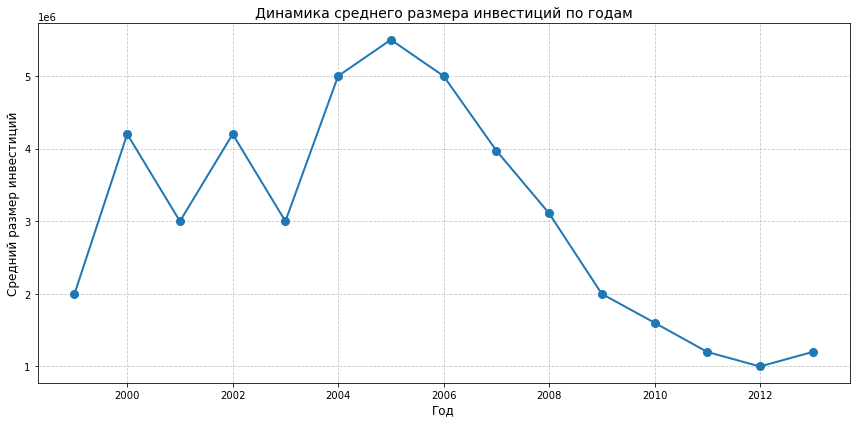

In [18]:
# Сбрасываем индекс
filtered_pivot_round = filtered_pivot_round.reset_index()

# Создаём контейнер графика
plt.figure(figsize=(12, 6))

# Строим линейный график динамики
plt.plot(
    filtered_pivot_round['funded_at'],
    filtered_pivot_round[('median', 'raised_amount')],
    marker='o',
    linestyle='-',
    linewidth=2,
    markersize=8
)

# Настраиваем оформление
plt.title('Динамика среднего размера инвестиций по годам', fontsize=14)
plt.xlabel('Год', fontsize=12)
plt.ylabel('Средний размер инвестиций', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

### На основании полученных данных, можно сделать следующие выводы:

1. В 2005 году типичный размер собранных в рамках одного раунда средств был максимален
2. В диапазоне 2006 по 2012 год наблюдается отрицательная тенденция по количеству раундов и выделяемых в рамках каждого раунда средств. В 2013 году снова начался небольшой подъем.

## 2.2. Люди и их образование

Далее будем определять зависит ли полнота сведений о сотрудниках (например, об их образовании) от размера компаний.

Объединим информацию о людях и их образовании в одну таблицу, для оценки полноты информации.

### Объединям таблицы people и education

In [19]:
#Объединяем таблицы people и education
people_education_df = pd.merge(
    left=people_df,
    right=education_df,
    left_on='id',
    right_on='person_id',
    how='left'
)

### Предобработка degrees для присоединения и расширения данных

Попытаемся расширить данные по образованию с помощью таблицы `degrees_df`

Для присоединения таблицы `degrees_df` необходимо из поля `object_id` убрать значение `p:` и поменять тип данных на `int64`. Иначе сопоставить таблицы не получится.

In [20]:
#Убираем лишние символы из object_id
degrees_df['object_id']=degrees_df['object_id'].str.slice(2)

#Меняем тип данных на int64
degrees_df['object_id']=pd.to_numeric(degrees_df['object_id'])

print(degrees_df.head())

   id  object_id degree_type                       subject
0   1       6117         MBA                           NaN
1   2       6136          BA               English, French
2   3       6136          MS            Mass Communication
3   4       6005          MS           Internet Technology
4   5       5832         BCS  Computer Science, Psychology


### Делаем финальную таблицу для анализа образования

In [21]:
#Объединяем таблицы people и education
people_education_df = pd.merge(
    left=people_education_df,
    right=degrees_df,
    left_on='id_x',
    right_on='object_id',
    how='left'
)


# Подсчитываем долю строк с пропусками
people_education_df.isna().sum() / people_education_df.shape[0]

id_x                0.000000
first_name          0.000013
last_name           0.000003
company_id          0.808894
network_username    0.780148
id_y                0.427785
person_id           0.427785
instituition        0.428025
graduated_at        0.692611
id                  0.427785
object_id           0.427785
degree_type         0.485697
subject             0.578043
dtype: float64

Данные удалось максимально расширить.

`instituition (название учебного заведения)` - пропусков **42%**.

`degree_type (тип образования)` - пропусков **48%**.

`subject (специальность).` - пропусков **42%**.

По итогу предподготовки, достоточно выбрать один столбец `instituition` для анализа долей по категориям.

### Определяем критерии для будущих категорий компаний (по количеству сотрудников)

In [22]:
#Создаем таблицу с количеством сотрудников по компаниям
count_people_in_company = people_education_df.groupby('company_id')['id_x'].count().sort_values(ascending=False)

#Считаем меры центральной тенденции
count_people_in_company.describe()

count    22922.000000
mean         3.091746
std          7.948286
min          1.000000
25%          1.000000
50%          1.000000
75%          4.000000
max        722.000000
Name: id_x, dtype: float64

Из данных виден очень сильный разброс значений `min` и `max`, который характерен при сильных выбросах.

Также значения 25,50,75 процентиля, говорят о том, что в выборке стартапы с 1 или 2 сотрудниками.

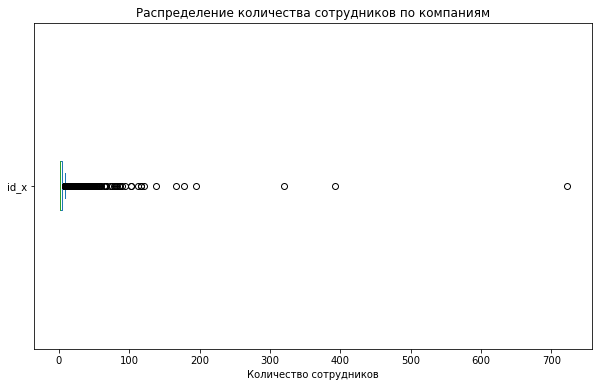

In [23]:
#Строим диаграмму размаха
plt.figure(figsize=(10, 6))
count_people_in_company.plot(kind='box', vert=False)
plt.title('Распределение количества сотрудников по компаниям')
plt.xlabel('Количество сотрудников')
plt.show()

По диаграмме видно, что значения больше 50 сотрудников, можно отнести к выбросам данных.

Но если оценивать инвестиционный рынок, это просто компании, которые будут находиться на более продвинутом этапе инвестирования.

Это нужно оценивать при категоризации компаний:

1. Компании от 1 до 4 человек, можно отнести к стартапам на ранних стадиях, которые пользуются помощью "ангелов" во время роста - для них определяем категорию `small`
2. Компании от 4 до 50 человек, можно отнести к стартапам чуть более зрелых, которые чаще всего пользутся помощью краудфандинговых инвестиций (много компаний по немного, без распределения долей) - для них определяем категорию `medium`
3. Компании от 50 до 100 человек, можно отнести стартапам достаточно зрелым для венчерного инвестирования - для них определяем категорию `large`
4. Компании от 100 и более, можно отнести стартапам для инвестирования в сериях. - для них определяем категорию `top`

### Анализ пропусков данных образования в зависимости от категории

In [24]:
#Создаем отдельный датафрейм для подсчета категорий и пропусков в них
company_category_df=people_education_df.groupby('company_id').agg({
    'id_x':'count',
    'instituition':'count'                                                          
})

#Убираем индексы
company_category_df = company_category_df.reset_index()

print(company_category_df.head())

   company_id  id_x  instituition
0         1.0     5             4
1         2.0     1             1
2         3.0     9             8
3         4.0    28            27
4         5.0   138           122


In [25]:
#Добавляем категории
company_category_df['people_group'] = pd.cut(
    company_category_df['id_x'],
    bins=[0, 4, 50, 100, 376],
    labels=["small", "medium", "large", "top"],
    right=True,
    include_lowest=True
)

print(company_category_df.head())

   company_id  id_x  instituition people_group
0         1.0     5             4       medium
1         2.0     1             1        small
2         3.0     9             8       medium
3         4.0    28            27       medium
4         5.0   138           122          top


In [26]:
#Считаем долю пропусков образования по категориям
share_nan_people_group=company_category_df.groupby('people_group').agg({
    'id_x':'sum',
    'instituition':'sum'
})

share_nan_people_group=share_nan_people_group.reset_index()

share_nan_people_group['share']=round((share_nan_people_group['instituition']/share_nan_people_group['id_x']),2)

print(share_nan_people_group)

  people_group   id_x  instituition  share
0        small  31825         19737   0.62
1       medium  34441         30727   0.89
2        large   1821          1689   0.93
3          top   1667          1518   0.91


<Figure size 504x216 with 0 Axes>

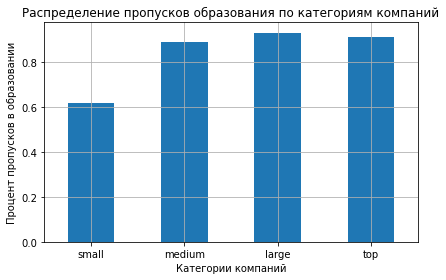

In [27]:
# Создаём контейнер графика matplotlib и задаём его размер
plt.figure(figsize=(7, 3))

# Строим диаграмму
share_nan_people_group.plot(
    kind='bar',
    x='people_group',
    y='share',
    rot=0,
    legend=False,
    title=f'Распределение пропусков образования по категориям компаний'
)

# Настраиваем оформление графика
plt.xlabel('Категории компаний')
plt.ylabel('Процент пропусков в образовании')
plt.grid()

plt.tight_layout()
plt.show()

По итогу исследования:

- 62% пропусков в графе образования имеют компаний `small`, которые относятся к стартапам на ранних стадиях

- 89% пропусков в графе образования имеют компаний `medium`, которые относятся к стартапам на более зрелых стадиях

- 93% пропусков в графе образования имеют компаний `large`, которые относятся к стартапам на этапах потенциального венчура

- 91% пропусков в графе образования имеют компаний `top`, которые относятся к крупным стартапам

Другими словами, с увеличением размера компании, пропусков становится больше.

## 2.3. Определяем принципы объединения таблиц

Некоторые названия столбцов встречаются в датасетах чаще других. 

В результате предварительной проверки датасетов было выяснено, что:
- `столбец company_id` присутствует в 2-х датасетах (`people_df`,`company_and_rounds_df`) и подходит для объединения данных.

### Проверка столбца network_username

Проверим `столбец network_username`, который присутствует в 2-х датасетах (`company_and_rounds_df`,`people_df`)

<div class="alert alert-info"> 

 <b>Комментарии студента:</b>     

__Меня очень смущало, что при попытки сопоставить таблицы по network_username ядро умерало__

- Посчитал уникальные значения в столбцах датафреймов и пересек на диаграмме Венна ниже.
- Переписал все выводы.


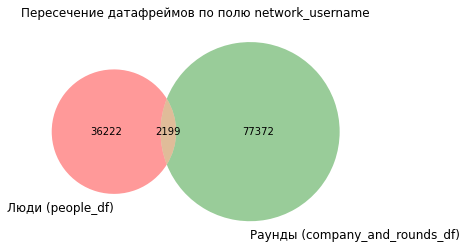

Общие пользователи: 2199
Только в people_df: 36222
Только в company_and_rounds_df: 77372
Записей в people_df: 226709
Записей в company_and_rounds_df: 217774
Пересечение в people_df: 5.72%
Пересечение в company_and_rounds_df: 2.76%


In [28]:
# Уникальные значения network_username из обоих датасетов
people_users = set(people_df['network_username'].dropna().unique())
company_users = set(company_and_rounds_df['network_username'].dropna().unique())

# Диаграмма Венна
venn2(
    [people_users, company_users],
    set_labels=('Люди (people_df)', 'Раунды (company_and_rounds_df)')
)
plt.title("Пересечение датафреймов по полю network_username")
plt.show()

# Расчёт статистики
intersection = people_users & company_users  # Общие пользователи
only_people = len(people_users) - len(intersection)  # Только в people_df
only_company = len(company_users) - len(intersection)  # Только в company_and_rounds_df
share_intersection_people = round(len(intersection) / len(people_users)*100,2)
share_intersection_company = round(len(intersection) / len(company_users)*100,2)

print(f"Общие пользователи: {len(intersection)}")
print(f"Только в people_df: {only_people}")
print(f"Только в company_and_rounds_df: {only_company}")
print(f"Записей в people_df: {len(people_df)}")
print(f"Записей в company_and_rounds_df: {len(company_and_rounds_df)}")
print(f"Пересечение в people_df: {share_intersection_people}%")
print(f"Пересечение в company_and_rounds_df: {share_intersection_company}%")

### В рамках диаграммы Венна видно, что перечения есть только:
- в 5.72% данных в датафрейме people_df.
- в 2.76% данных в датафрейме company_and_rounds_df.

### Объединять таблицы people_df и company_and_rounds_df по полю network_username нет смысла.

При соединении таблиц методом inner по полю network_username:

- потеряется 95% данных из датафрейма people_df**
- потеряется 97% данных из датафрейма company_and_rounds_df**

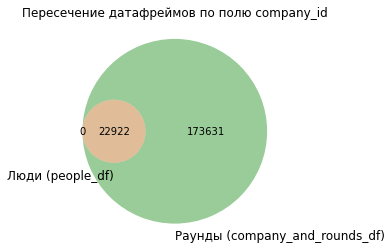

Общие пользователи: 22922
Только в people_df: 0
Только в company_and_rounds_df: 173631
Записей в people_df: 226709
Записей в company_and_rounds_df: 217774
Пересечение в people_df: 100.0%
Пересечение в company_and_rounds_df: 11.66%


In [29]:
# Уникальные значения network_username из обоих датасетов
people_id = set(people_df['company_id'].dropna().unique())
company_id = set(company_and_rounds_df['company_id'].dropna().unique())

# Диаграмма Венна
venn2(
    [people_id, company_id],
    set_labels=('Люди (people_df)', 'Раунды (company_and_rounds_df)')
)
plt.title("Пересечение датафреймов по полю company_id")
plt.show()

# Расчёт статистики
intersection_2 = people_id & company_id  # Общие пользователи
only_people_2 = len(people_id) - len(intersection_2)  # Только в people_df
only_company_2 = len(company_id) - len(intersection_2)  # Только в company_and_rounds_df
share_intersection_people_2 = round(len(intersection_2) / len(people_id)*100,2)
share_intersection_company_2 = round(len(intersection_2) / len(company_id)*100,2)

print(f"Общие пользователи: {len(intersection_2)}")
print(f"Только в people_df: {only_people_2}")
print(f"Только в company_and_rounds_df: {only_company_2}")
print(f"Записей в people_df: {len(people_df)}")
print(f"Записей в company_and_rounds_df: {len(company_and_rounds_df)}")
print(f"Пересечение в people_df: {share_intersection_people_2}%")
print(f"Пересечение в company_and_rounds_df: {share_intersection_company_2}%")

#### В случае с полем `company_id` диаграмма Венна показывает:
- в 100% данных в датафрейме people_df.

### Вывод по принципу объединения таблиц:

При соединении таблиц лучше пользоваться полем `company_id`

Так как в случае inner соединениия таблиц у нас остается 20 976 строк данных (по сравнению с 2007 строкамми данных в случае поля `network_username`)

### 2.4. Проверка проблемного датасета company_and_rounds_df и причина возникновения пропусков

Во время собственного анализа данных у заказчика больше всего вопросов возникло к датасету company_and_rounds.csv.

В нём много пропусков как раз в информации о раундах, которая заказчику важна.

### Обновленная таблица company_and_rounds

- `company_id` — идентификатор компании.
- `name` — название компании.
- `category_code` — категория области деятельности компании.
- `status` — статус компании.
- `founded_at` — дата инвестирования.
- `closed_at` — дата закрытия компании.
- `domain` — официальный сайт компании.
- `network_username` — ник компании в сети.
- `country_code` — код страны компании.
- `investment_rounds` — число инвестиционных раундов.
- `funding_rounds` — число раундов финансирования.
- `funding_total` — сумма финансирования.
- `milestones` — вехи финансирования.
- `funding_round_id` — идентификатор этапа финансирования.
- `funded_at` — дата финансирования.
- `funding_round_type` — тип финансирования.
- `raised_amount` — сумма финансирования.
- `pre_money_valuation` — предварительная денежная оценка.
- `participants` — число участников.
- `is_first_round` — является ли раунд первым.
- `is_last_round` — является раунд последним.

---
<div class="alert alert-info"> 

 <b>Комментарии студента:</b>     

__Убрал выводы__


<div class="alert alert-info"> 
    
###Проведем анализ первых 100 уникальных значений по каждому столбцу, для выявления аномалий.

### Обновленная таблица company_and_rounds

- `company_id` — идентификатор компании.
- `name` — название компании.
- `category_code` — категория области деятельности компании.
- `status` — статус компании.
- `founded_at` — дата инвестирования.
- `closed_at` — дата закрытия компании.
- `domain` — официальный сайт компании.
- `network_username` — ник компании в сети.
- `country_code` — код страны компании.
- `investment_rounds` — число инвестиционных раундов.
- `funding_rounds` — число раундов финансирования.
- `funding_total` — сумма финансирования.
- `milestones` — вехи финансирования.
- `funding_round_id` — идентификатор этапа финансирования.
- `funded_at` — дата финансирования.
- `funding_round_type` — тип финансирования.
- `raised_amount` — сумма финансирования.
- `pre_money_valuation` — предварительная денежная оценка.
- `participants` — число участников.
- `is_first_round` — является ли раунд первым.
- `is_last_round` — является раунд последним.

### 2.4.1. Разделяем датафрейм на 2 части

#### Делаем отдельную таблицу с данными о компаниях 

Важно:

1. Выделить в датасет нужные столбцы
2. Убрать дубликаты
3. Убрать пропуски в первичных ключах таблицы (company_id)

In [30]:
#Делаем отдельную таблицу по компаниям
df_company = company_and_rounds_df[['company_id', 'name', 'category_code', 'status', 
                             'founded_at', 'closed_at', 'domain', 
                             'network_username', 'country_code', 
                             'investment_rounds', 'funding_rounds', 
                            'funding_total', 'milestones']]
#Убираем дубли записей
df_company=df_company.drop_duplicates(subset=['company_id', 'name', 'category_code', 'status', 
                             'founded_at', 'closed_at', 'domain', 
                             'network_username', 'country_code', 'investment_rounds', 'funding_rounds', 
                            'funding_total', 'milestones'], keep='first')

In [31]:
# Подсчитываем долю строк с пропусками
df_company.isna().sum() / df_company.shape[0]

company_id           0.000005
name                 0.000005
category_code        0.373271
status               0.000005
founded_at           0.535868
closed_at            0.986670
domain               0.356182
network_username     0.589980
country_code         0.552337
investment_rounds    0.000005
funding_rounds       0.000005
funding_total        0.000005
milestones           0.000005
dtype: float64

In [32]:
#Убираем пропуски по колонке company_id
df_company=df_company.dropna(subset=['company_id'])

# Выводим информацию о датасете
df_company.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 196553 entries, 0 to 217469
Data columns (total 13 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   company_id         196553 non-null  float64
 1   name               196553 non-null  object 
 2   category_code      123186 non-null  object 
 3   status             196553 non-null  object 
 4   founded_at         91227 non-null   object 
 5   closed_at          2620 non-null    object 
 6   domain             126545 non-null  object 
 7   network_username   80591 non-null   object 
 8   country_code       87990 non-null   object 
 9   investment_rounds  196553 non-null  float64
 10  funding_rounds     196553 non-null  float64
 11  funding_total      196553 non-null  float64
 12  milestones         196553 non-null  float64
dtypes: float64(5), object(8)
memory usage: 21.0+ MB


#### Делаем отдельную таблицу с данными по раундам инвестирования


Важно:

1. Выделить в датасет нужные столбцы
2. Убрать дубликаты
3. Убрать пропуски в первичных ключах таблицы (company_id)
4. Убрать пропуски в типе раундов (funding_round_type)

In [33]:
#Делаем отдельную таблицу по раундам инвестирования
df_rounds = company_and_rounds_df[['company_id', 'raised_amount', 'funding_round_id', 
                            'funded_at', 'funding_round_type', 'pre_money_valuation', 
                            'participants', 'is_first_round', 
                            'is_last_round']]

#Убираем дубли записей
df_rounds = df_rounds.drop_duplicates(subset=['company_id', 'raised_amount', 'funding_round_id', 
                            'funded_at', 'funding_round_type', 'pre_money_valuation', 
                            'participants', 'is_first_round', 
                            'is_last_round'], keep='first')

In [34]:
# Подсчитываем долю строк с пропусками
df_rounds.isna().sum() / df_rounds.shape[0]

company_id             0.001387
raised_amount          0.756959
funding_round_id       0.756959
funded_at              0.758098
funding_round_type     0.756959
pre_money_valuation    0.756959
participants           0.756959
is_first_round         0.756959
is_last_round          0.756959
dtype: float64

In [35]:
#Убираем пропуски по колонке funding_round_type
df_rounds=df_rounds.dropna(subset=['funding_round_type'])

#Убираем пропуски по колонке company_id
df_rounds=df_rounds.dropna(subset=['company_id'])

#Выводим информацию о датасете
df_rounds.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 52626 entries, 0 to 217471
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   company_id           52626 non-null  float64
 1   raised_amount        52626 non-null  float64
 2   funding_round_id     52626 non-null  float64
 3   funded_at            52382 non-null  float64
 4   funding_round_type   52626 non-null  object 
 5   pre_money_valuation  52626 non-null  float64
 6   participants         52626 non-null  float64
 7   is_first_round       52626 non-null  float64
 8   is_last_round        52626 non-null  float64
dtypes: float64(8), object(1)
memory usage: 4.0+ MB


---

## Выводы после предобработки

1) Датасет `company_and_rounds_df` был разделен на:
   - df_company
   - df_rounds

2) Из датасетов были убраны дубликаты и пропуски в ключевых колонках (`company_id` и `funding_round_type`)
   
3) Проанализировали способы соединения таблиц
   - **Для сопоставления будем использовать столбцы:**
   
   `company_id` - id компании
   
   `object_id`/`person_id` - id сотрудника
   
   
   - Столбец `network_username` не подходит, т.к. обогащения данных будет минимальное.
   
---

## Выводы после первичного исследования данных
   
1) По итогу исследования пропусков относительно категорий компании выснили:

   - 62% пропусков в графе образования имеют компаний `small`, которые относятся к стартапам на ранних стадиях

   - 89% пропусков в графе образования имеют компаний `medium`, которые относятся к стартапам на более зрелых стадиях

   - 93% пропусков в графе образования имеют компаний `large`, которые относятся к стартапам на этапах потенциального венчура

   - 91% пропусков в графе образования имеют компаний `top`, которые относятся к крупным стартапам

   Другими словами, с увеличением размера компании, пропусков становится больше.
   
2) По итогу исследования таблицы с инвестиционными раундамы

   - В 2005 году типичный размер собранных в рамках одного раунда средств был максимален
   - В диапазоне 2006 по 2012 год наблюдается отрицательная тенденция по количеству раундов и выделяемых в рамках каждого раунда средств. В 2013 году снова начался небольшой подъем.
   



## 3. Исследовательский анализ объединённых таблиц

План исследовательского анализа:

1. Объединение данных
2. Анализ выбросов
3. Анализ "бесплатных" покупок
4. Анализ цен стартапов

### 3.1. Объединение данных

Объединим таблицы для анализа компании, которые меняли или готовы менять владельцев. 

Получение инвестиций или финансирования, по мнению заказчика, означает интерес к покупке или продаже компании.

Выбераем только те компании, у которых указаны значения:
- funding_rounds больше нуля.
или 
- investment_rounds больше нуля, 
или 
- status указано acquired.

In [36]:
# Выбираем нужный список компаний
df_company_filter=df_company[(df_company['funding_rounds']>0)|(df_company['investment_rounds']>0)|(df_company['status'] == 'acquired')]

df_company_filter.info()

df_company_filter.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 40747 entries, 0 to 217469
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   company_id         40747 non-null  float64
 1   name               40747 non-null  object 
 2   category_code      35315 non-null  object 
 3   status             40747 non-null  object 
 4   founded_at         27807 non-null  object 
 5   closed_at          2128 non-null   object 
 6   domain             35754 non-null  object 
 7   network_username   20850 non-null  object 
 8   country_code       34742 non-null  object 
 9   investment_rounds  40747 non-null  float64
 10  funding_rounds     40747 non-null  float64
 11  funding_total      40747 non-null  float64
 12  milestones         40747 non-null  float64
dtypes: float64(5), object(8)
memory usage: 4.4+ MB


,company_id,name,category_code,status,founded_at,closed_at,domain,network_username,country_code,investment_rounds,funding_rounds,funding_total,milestones
0,1.0,Wetpaint,web,operating,2005-10-17,NaN,wetpaint-inc.com,BachelrWetpaint,USA,0.0,3.0,39750000.0,5.0
3,10.0,Flektor,games_video,acquired,NaN,NaN,flektor.com,NaN,USA,0.0,0.0,0.0,0.0
4,100.0,There,games_video,acquired,NaN,NaN,there.com,NaN,USA,0.0,0.0,0.0,4.0
15,1001.0,FriendFeed,web,acquired,2007-10-01,NaN,friendfeed.com,friendfeed,USA,0.0,1.0,5000000.0,3.0
20,10014.0,Mobclix,mobile,acquired,2008-03-01,NaN,mobclix.com,mobclix,USA,0.0,1.0,0.0,4.0


### 3.2. Анализ выбросов

Проанализируем обычный для рассматриваемого периода размер средств, который предоставлялся компаниям.

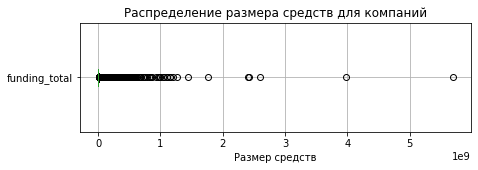

count    4.074700e+04
mean     1.013561e+07
std      5.646436e+07
min      0.000000e+00
25%      0.000000e+00
50%      6.000000e+05
75%      5.650650e+06
max      5.700000e+09
Name: funding_total, dtype: float64

In [37]:
# Создаём контейнер графика matplotlib и задаём его размер
plt.figure(figsize=(7, 2))

# Строим диаграмму размаха значений в столбце rating
df_company_filter.boxplot(column='funding_total', vert=False)

# Добавляем заголовок и метки оси
plt.title('Распределение размера средств для компаний')
plt.xlabel('Размер средств')

# Выводим график
plt.show()

#Выводим меры центральной тенденции
df_company_filter['funding_total'].describe()

#### Выводы по диаграмме размаха

График  отобразил значение 1e9 - значения в 1 000 000 000 единицах (млрд) и это не очень информативно.

По диаграмме размаха выбросы начинаются примерно после 1 300 000 000 у.е. (1.3 млрд)

---

#### Изучаем меры центральной тенденци:

count = 4.074700e+04 = 40,747 (количество наблюдений)

mean = 1.013561e+07 = 10 135 610 (среднее значение ~10.1 миллионов)

std = 5.646436e+07 = 56 464 360 (стандартное отклонение ~56.5 миллионов)

min = 0.000000e+00 = 0 (минимум)

25% = 0.000000e+00 = 0 (первый квартиль)

50% = 6.000000e+05 = 600 000 (медиана ~600 тысяч)

75% = 5.650650e+06 = 5 650 650 (третий квартиль ~5.65 миллионов)

max = 5.700000e+09 = 5 700 000 000 (максимум ~5.7 миллиардов)


#### Выводы по мерам центральной тенденции:

1. 25% компаний: Не получили финансирования (0)

2. Медиана (50%): 600,000 - типичный стартап получил ~600 тыс.

3. Среднее значение: 10.1 млн - сильно выше медианы, что указывает на правостороннюю асимметрию (несколько стартапов с огромным финансированием тянут среднее вверх)

4. Максимум: 5.7 млрд - экстремальный выброс

---
Для корректной визуалиции распределения возьмем:

- Компании в которых, хотябы что-то проинвестировали
- Но не более 5 650 650 (75 квартиль данных)

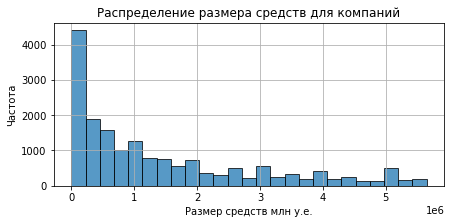

In [38]:
# Убираем из
filtered_funding_total = df_company_filter[(df_company_filter['funding_total']>0)&(df_company_filter['funding_total']<5650650)]

# Создаём контейнер графика matplotlib и задаём его размер
plt.figure(figsize=(7, 3))

# Строим гистограмму с помощью pandas через plot(kind='hist')
filtered_funding_total['funding_total'].plot(
                kind='hist', # Тип графика - гистограмма
                bins=25, # Устанавливаем количество корзин - всего 25
                alpha=0.75,
                edgecolor='black',
                rot=0, # Градус вращения подписи по оси Х
)

# Настраиваем оформление графика
plt.title('Распределение размера средств для компаний')
plt.xlabel('Размер средств млн у.е.')
plt.ylabel('Частота')
# Добавляем сетку графика
plt.grid()

# Выводим график
plt.show()

По графику распределения видена правосторонняя ассиметрия данных.

Самый популярной суммой инвестирования до 250 000 у.е. судя по графику.

### 3.3. Анализ бесплатных покупок

Исследуем компании, которые были проданы за ноль или за один доллар, и при этом известно, что у них был ненулевой общий объём финансирования.


In [39]:
#Объединяем таблицу раундов и компаний
company_acquired = df_rounds.merge(df_company,on='company_id',how='left')

#Сделаем отдельную выборку "бесплатно" проданных компаний с не нулевым финансированием
company_acquired_free = company_acquired[(company_acquired['raised_amount']<2)&(company_acquired['funding_total']>0)&(company_acquired['status']=='acquired')]

#Считаем количество компаний
print(f'Количество компаний')
company_acquired_free['funding_total'].count()

Количество компаний


192

Рассчитаем аналитически верхнюю и нижнюю границу выбросов для столбца funding_total и укажим, каким процентилям границы соответствуют.

In [40]:
#Считаем 25 процентиль
Q1 = np.percentile(company_acquired_free['funding_total'], 25)
#Считаем 75 процентиль
Q3 = np.percentile(company_acquired_free['funding_total'], 75)

#Считаем межквартильный размах (IQR):
IQR = Q3 - Q1

#Определяем границы выбросов
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print(f'25 процентиль - {Q1}')
print(f'75 процентиль - {Q3}')

print(f'Межквартильный размах - {IQR}')
print(f'Нижняя граница выбросов - {lower_bound}')
print(f'Верхняя граница выбросов - {upper_bound}')

25 процентиль - 1705000.0
75 процентиль - 24812500.0
Межквартильный размах - 23107500.0
Нижняя граница выбросов - -32956250.0
Верхняя граница выбросов - 59473750.0


In [41]:
# Расчет процентиля для верхней границы и процента выбросов
count_below = np.sum(company_acquired_free['funding_total']<= upper_bound)
total_str = len(company_acquired_free['funding_total'])
percentile = (count_below / total_str) * 100

print(f"Верхняя граница: {upper_bound:,.2f}")
print(f"Соответствует процентилю: {percentile:.2f}%")
print(f"Процент выбросов: {100 - percentile:.2f}%")

Верхняя граница: 59,473,750.00
Соответствует процентилю: 91.15%
Процент выбросов: 8.85%


### Выводы по бесплатным покупкам:

Изучая 192 компании, купленные "бесплатно" мы выявили:

Отрицательную нижнюю границу выбросов.

Это нормальное явление для данных с:

- Огромным разбросом (большой IQR)
- Правосторонней асимметрией

Другими словами, выбросы имеются только с правой стороны.

Верхняя граница выбросов соответствует процентилю: 91.15%

Итоговый процент выбросов в выборке: 8.85%

### 3.4. Анализ цен стартапов по категориям

Категории стартапов с типично высокими ценами покупки стартапов и значительным разбросом цен могут быть привлекательными для крупных инвесторов, которые готовы к высоким рискам ради потенциально больших доходов. 


Среди категорий стартапов выделим категории стартапов, характеризующиеся:

- типично высокими ценами;
- наибольшим разбросом цен за стартап.

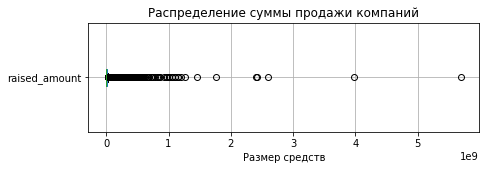

In [42]:
# Группируем компании по размеру покупки
company_acquired_raised = company_acquired.groupby('company_id')['raised_amount'].sum()

# Сбрасываем индексы с серии
company_acquired_raised = company_acquired_raised.reset_index()

# Создаём контейнер графика matplotlib и задаём его размер
plt.figure(figsize=(7, 2))

# Строим диаграмму размаха значений в столбце rating
company_acquired_raised.boxplot(column='raised_amount', vert=False)

# Добавляем заголовок и метки оси
plt.title('Распределение суммы продажи компаний')
plt.xlabel('Размер средств')

# Выводим график
plt.show()

In [43]:
#Считаем 25 процентиль
Q1 = np.percentile(company_acquired_raised['raised_amount'], 25)
#Считаем 75 процентиль
Q3 = np.percentile(company_acquired_raised['raised_amount'], 75)

#Считаем межквартильный размах (IQR):
IQR = Q3 - Q1

#Определяем границы выбросов
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print(f'25 процентиль - {Q1}')
print(f'75 процентиль - {Q3}')

print(f'Межквартильный размах - {IQR}')
print(f'Нижняя граница выбросов - {lower_bound}')
print(f'Верхняя граница выбросов - {upper_bound}')

25 процентиль - 200000.0
75 процентиль - 9106395.0
Межквартильный размах - 8906395.0
Нижняя граница выбросов - -13159592.5
Верхняя граница выбросов - 22465987.5


### Выводы по разделениям на категории:

Изучая диаграмму размаха и показатели выбросов, к нужной нам категории можно отнести компании, которые находяться начиная с верхней границы выбросов.

Разделим на 2 категории:
- `cheap` - условно дешевые компании
- `dear` - которые находятся на верхнем значение выбросов и имеют большую цену

In [44]:
#Добавляем категории
company_acquired_raised['raised_group'] = pd.cut(
    company_acquired['raised_amount'],
    bins=[0,22465987,5700000000],
    labels=["cheap", "dear"],
    right=True,
    include_lowest=True
)

print(company_acquired_raised.head())

   company_id  raised_amount raised_group
0         1.0   3.975000e+07        cheap
1         4.0   4.500000e+07        cheap
2         5.0   2.425700e+09         dear
3         7.0   8.000000e+05        cheap
4         9.0   1.650000e+07        cheap


### 3.5. Анализ раундов стартапа перед покупкой

Заказчика интересует типичное значение количества раундов для каждого возможного статуса стартапа.

Подготовим отдельную сгруппированную таблицу и постройте график, который отображает, сколько в среднем раундов финансирования проходило для стартапов из каждой группы.

status
acquired     2.758438
closed       1.886505
ipo          4.471729
operating    2.491418
Name: funding_rounds, dtype: float64


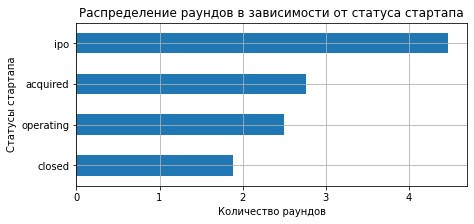

In [45]:
round_status = company_acquired.groupby('status')['funding_rounds'].mean()

print(round_status)

# Сортируем значения
round_status_sort = round_status.sort_values()

# Создаём контейнер графика matplotlib и задаём его размер
plt.figure(figsize=(7, 3))

# Строим диаграмму
round_status_sort.plot(
               kind='barh',
               rot=0,
               legend=False,
               title=f'Распределение раундов в зависимости от статуса стартапа'
)

# Настраиваем оформление графика
plt.ylabel('Статусы стартапа')
plt.xlabel('Количество раундов')
# Добавляем сетку графика
plt.grid()

# Выводим график
plt.show()


## Подведём итоги

В ходе исследования проанализировали данные 217 774 стартапов. 

Данные включали 5 таблиц в которых хранилась: 

- информация компаниях и инвестиционных раундах, 
- информация о сотрудниках компаний и их образовании

Акцент исследования был на том, чтобы оценить корректость данных, провести качественную предобработку и провести анализ стартапов.

В ходе анализа была выполнена:

1) Загрузка данных и знакомство с ними.

2) Предобработка данных:

- Датасет `company_and_rounds_df` был разделен на:
   - df_company
   - df_rounds
- Из датасетов были убраны дубликаты и пропуски в ключевых колонках (`company_id` и `funding_round_type`)
- Проанализировали способы соединения таблиц и выбран оптимальный для максимального обогащения данных (столбец `company_id`)


3) Исследовательский анализ данных:

- Проведена аналитика пропусков данных в образовании сотрудников (относительно размера компаний)
- Проведена аналитика типичных размеров собранных в рамках одного раунда средств по годам (Вывели кривую роста и падения трендов)
- Проанализированы выбросы данных по размеру инвестиций у компаний
- Проведена аналитика "бесплатных" продаж, размер сделок которых составлял 0 или 1 у.е.
- Проведена аналитика стартапов по категориям итоговой стоимости сделки
- Проведена аналитика распределение количества раундов в зависимости от статуса стартапа


4) Построены выводы по каждому этапу анализа и подготовлены рекомендации.

---


### Ответы на исследовательские вопросы

В результате исследования были:

1. Определены категории компаний в зависимости от количества сотрудников (small, midle, large, top) и проанализированны пропуски

   - 62% пропусков в графе образования имеют компаний small, которые относятся к стартапам на ранних стадиях

   - 89% пропусков в графе образования имеют компаний medium, которые относятся к стартапам на более зрелых стадиях

   - 93% пропусков в графе образования имеют компаний large, которые относятся к стартапам на этапах потенциального венчура

   - 91% пропусков в графе образования имеют компаний top, которые относятся к крупным стартапам

Другими словами, с увеличением размера компании, пропусков становится больше.

2. По итогу исследования таблицы с инвестиционными раундамы по годам

   - В 2005 году типичный размер собранных в рамках одного раунда средств был максимален
   - В диапазоне 2006 по 2012 год наблюдается отрицательная тенденция по количеству раундов и выделяемых в рамках каждого раунда средств. В 2013 году снова начался небольшой подъем.
   
3. При анализе выброса данных по сумме инвестирования обнаружили:

   - 25% компаний: Не получили финансирования (0)

   - Типичный стартап получил ~600 тыс.

4. Изучая 192 компании, купленные "бесплатно" мы выявили:

   - Выбросы данных имеются только с правой стороны и верхняя граница выбросов соответствует процентилю: 91.15%
   
   - Итоговый процент выбросов в выборке: 8.85%

5. Для определения категории дорогих `dear` определили минимальный парог от 22 465 987 у.е. и отметили эти компании

6. Посчитали среднее количество шагов до реализации каждого шага стартапа:

   - acquired     (2.76 раундов)
   - closed       (1.89 раунд)
   - ipo          (4.47 раунд)
   - operating    (2.49 раунд)




### Рекомендации

Исследовательский анализ данных позволил ознакомиться с данными, оценить и определить ряд рекомендаций:

- Для оценки сотрудников и поиска корреляций с результатами компаний требуется обогащение данных (так как размер пропусков в разрезе образования очень большой)

- При поиске стартапа для его развития необходимо расчитывать на ~600 тыс у.е. инвестиций на старте.

- Стартап стоит растить до уровня 22 465 987 у.е. для того, чтобы он стал потенциально интересен крупным инвесторам

- В среднем стартап пройдет 2-3 раунда инвестирования, что стоит оценивать при планировании развития компании.

.